In [1]:
import pandas as pd
import numpy as np
import itertools
import scipy.stats as st
from sklearn.metrics import r2_score
import seaborn as sns; sns.set_theme(color_codes=False)
import matplotlib.pyplot as plt
import scipy as sp
import math

%matplotlib inline

In [2]:
def get_all_params(df):
    """Initializes the variables containing the run names and the parameters dictionary for each run."""
    
    def get_run_params(run):
        result = {}
        params = df[df.type == "param"]
        for index, row in params[params.run == run].iterrows():
            # Convert numerical values to float
            try:
                result[row.attrname] = float(row.attrvalue)
            except ValueError:
                result[row.attrname] = row.attrvalue
        return result
    
    global all_params, all_runs
    
    all_params = {}
    all_runs = df.run.unique()
    for run in all_runs:       
        all_params[run] = get_run_params(run)

In [3]:
def get_throughput(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'Throughput:vector')


def get_throughput_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'Throughput:vector')


def get_rt(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'ResponseTime:vector')


def get_rt_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'ResponseTime:vector')


def get_num_plane(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'numPlane:vector')


def get_num_plane_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'numPlane:vector')


def get_landing_queue(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'LandingQueueTime:vector')


def get_landing_queue_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'LandingQueueTime:vector')


def get_takeoff_queue(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'TakeoffQueueTime:vector')


def get_takeoff_queue_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'TakeoffQueueTime:vector')


def get_LQ_len(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'LQ_length:vector')


def get_LQ_len_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'LQ_length:vector')


def get_TQ_len(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'TQ_length:vector')


def get_TQ_len_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'TQ_length:vector')


def get_ROT(run):
    
    if run is None:
        return None

    return get_scalar(run, 'ROT')

In [4]:
def find_runs(params={}):
    """Returns an array containing the run names with the parameters provided as a dictionary."""
    
    if params == {}:
        return all_runs.tolist()
    
    result = []
    
    for run in all_runs:       
        run_params = all_params[run]
        to_keep = True
                
        for name, value in params.items():
            if type(value) is str:
                check_value = '"'+value+'"'
            else:
                check_value = value
                
            if name not in run_params or run_params[name] != check_value:
                to_keep = False
                break
        if to_keep:      
            result.append(run)
                
    return result

In [5]:
def get_vecvalue(run, name):
    """Returns an array containing the values of a given vector for the specified run."""
     
    try:
        return np.fromstring(df[(df.type == "vector") & (df.run == run) & (df.name == name)].iloc[0].vecvalue, 
                             sep=" ", dtype=np.double)
    except Exception:
        return np.array([])


def get_vectime(run, name):
    """Returns an array containing the time values of a given vector for the specified run."""
    
    try:
        return np.fromstring(df[(df.type == "vector") & (df.run == run) & (df.name == name)].iloc[0].vectime, 
                             sep=" ", dtype=np.double)
    except Exception:
        return np.array([])

    
def get_scalar(run, name):
    """Returns the scalar value of the given statistic for the specified run."""
    strvalue = df[(df.type == "scalar") & (df.run == run) & (df.name == name)].iloc[0].value
    try:
        return float(value)
    except Exception:
        return strvalue

In [6]:
all_params = {}
all_runs = None
df = pd.read_csv('../results/control_tower_park0.csv')
get_all_params(df)

In [7]:
iats = range(2400, 7300, 1200)
pts = range(3600, 36100, 8100)
rows = []

for iat in iats:
    for pt in pts:
        partialsum = 0
        runs = find_runs({'**.interarrivalTimeAvg': float(iat), '**.parkingTimeAvg': float(pt)})
        for rep, run in enumerate(runs):
            num_list = get_num_plane(run)
            num_planes = np.mean(num_list)
            print(num_list)
            perc = np.percentile(num_list, 95)
            print(perc)
            #row = {'iat': iat, 'pt': pt, 'rep': rep, 'num': num_planes}
            #rows.append(row)
            #print(row)
            partialsum = partialsum + num_planes
            print(num_planes)
        avg_planes = partialsum/5
        row = {'iat': iat, 'pt': pt, 'num': avg_planes, 'deterministic': pt/iat//1}
        rows.append(row)
        print(row)

[2. 2. 3. ... 0. 0. 0.]
4.0
1.6068423275609993
[4. 4. 4. ... 0. 0. 0.]
4.0
1.6655182500731303
[0. 0. 1. ... 1. 1. 1.]
4.0
1.576022347094553
[1. 1. 1. ... 5. 5. 5.]
4.0
1.6384778012684988
[1. 1. 1. ... 1. 1. 1.]
4.0
1.556166791445591
{'iat': 2400, 'pt': 3600, 'num': 1.6086055034885547, 'deterministic': 1.0}
[3. 3. 3. ... 7. 7. 7.]
9.0
5.0589689380387055
[3. 3. 3. ... 4. 4. 4.]
9.0
4.804596204550633
[7. 7. 7. ... 2. 2. 2.]
9.0
5.163486852796828
[6. 6. 6. ... 3. 3. 3.]
9.0
4.971928912570259
[2. 2. 3. ... 2. 3. 3.]
9.0
4.856145251396648
{'iat': 2400, 'pt': 11700, 'num': 4.971025231870614, 'deterministic': 4.0}
[7. 7. 7. ... 6. 6. 6.]
14.0
8.672484399375975
[ 6.  6.  6. ... 12. 12. 11.]
13.0
8.479639627919079
[7. 7. 6. ... 5. 5. 5.]
13.0
8.05569480160151
[6. 6. 7. ... 3. 3. 3.]
13.0
8.338802430228402
[4. 4. 5. ... 6. 6. 6.]
13.0
8.146128361699363
{'iat': 2400, 'pt': 19800, 'num': 8.338549924164864, 'deterministic': 8.0}
[8. 8. 9. ... 7. 6. 6.]
18.0
11.70047759836252
[ 7.  7.  8. ... 11. 12.

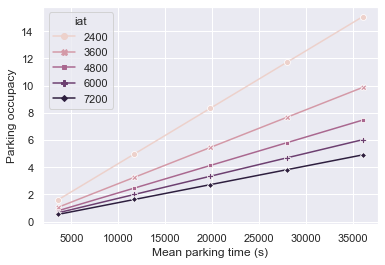

In [8]:
data = pd.DataFrame(rows)
fig = sns.lineplot(data=data, x='pt', y='num', hue='iat', style='iat', markers=True, dashes=False)
plt.xlabel("Mean parking time (s)")
plt.ylabel("Parking occupacy")
plt.grid(True, 'both')
plt.show()

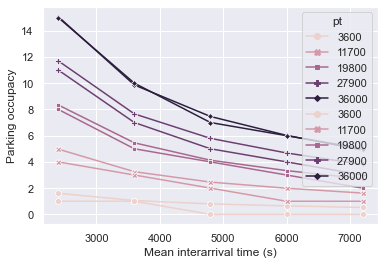

In [9]:
data = pd.DataFrame(rows)
fig2 = sns.lineplot(data=data, x='iat', y='num', hue='pt', style='pt', markers=True, dashes=False)
fig3 = sns.lineplot(data=data, x='iat', y='deterministic', hue='pt', style='pt', markers=True, dashes=False)
plt.xlabel("Mean interarrival time (s)")
plt.ylabel("Parking occupacy")
plt.grid(True, 'both')
plt.show()

In [10]:
runs = find_runs({'**.interarrivalTimeAvg': 2400, '**.parkingTimeAvg': 3600})
for rep, run in enumerate(runs):
    num_list = get_num_plane(run)
    perc = np.percentile(num_list, 90)
    print('percentile: ', perc)

percentile:  3.0
percentile:  3.0
percentile:  3.0
percentile:  3.0
percentile:  3.0


In [11]:
iats = range(2400, 7300, 1200)
pts = range(3600, 36100, 8100)
rows = []

for iat in iats:
    for pt in pts:
        partialsum = 0
        runs = find_runs({'**.interarrivalTimeAvg': float(iat), '**.parkingTimeAvg': float(pt)})
        for rep, run in enumerate(runs):
            num_list = get_num_plane(run)
            perc = np.percentile(num_list, 95)
            print(perc)
            partialsum = partialsum + perc
        perc_planes = partialsum/5
        row = {'iat': iat, 'pt': pt, 'perc': int(round(perc_planes, 0)), 'deterministic': pt/iat//1}
        rows.append(row)
        print(row)

4.0
4.0
4.0
4.0
4.0
{'iat': 2400, 'pt': 3600, 'perc': 4, 'deterministic': 1.0}
9.0
9.0
9.0
9.0
9.0
{'iat': 2400, 'pt': 11700, 'perc': 9, 'deterministic': 4.0}
14.0
13.0
13.0
13.0
13.0
{'iat': 2400, 'pt': 19800, 'perc': 13, 'deterministic': 8.0}
18.0
17.0
17.0
17.0
18.0
{'iat': 2400, 'pt': 27900, 'perc': 17, 'deterministic': 11.0}
21.0
22.0
22.0
22.0
21.0
{'iat': 2400, 'pt': 36000, 'perc': 22, 'deterministic': 15.0}
3.0
3.0
3.0
3.0
3.0
{'iat': 3600, 'pt': 3600, 'perc': 3, 'deterministic': 1.0}
7.0
6.0
6.0
6.0
7.0
{'iat': 3600, 'pt': 11700, 'perc': 6, 'deterministic': 3.0}
10.0
10.0
9.0
9.0
9.0
{'iat': 3600, 'pt': 19800, 'perc': 9, 'deterministic': 5.0}
12.0
12.0
12.0
13.0
12.0
{'iat': 3600, 'pt': 27900, 'perc': 12, 'deterministic': 7.0}
15.0
16.0
15.0
15.0
15.0
{'iat': 3600, 'pt': 36000, 'perc': 15, 'deterministic': 10.0}
3.0
2.0
2.0
2.0
2.0
{'iat': 4800, 'pt': 3600, 'perc': 2, 'deterministic': 0.0}
5.0
5.0
5.0
5.0
5.0
{'iat': 4800, 'pt': 11700, 'perc': 5, 'deterministic': 2.0}
8.0
8.0


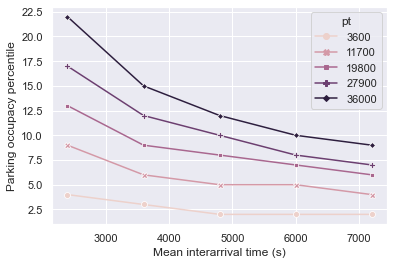

In [12]:
data = pd.DataFrame(rows)
fig2 = sns.lineplot(data=data, x='iat', y='perc', hue='pt', style='pt', markers=True, dashes=False)
plt.xlabel("Mean interarrival time (s)")
plt.ylabel("Parking occupacy percentile")
plt.grid(True, 'both')
plt.show()

In [13]:
all_params = {}
all_runs = None
df = pd.read_csv('../results/control_tower_park1.csv')
get_all_params(df)

In [14]:
iats = range(2400, 7300, 600) # 600, 1200
pts = range(3600, 36100, 8100) # 2700, 8100
rows = []

for iat in iats:
    for pt in pts:
        runs = find_runs({'**.interarrivalTimeAvg': float(iat), '**.parkingTimeAvg': float(pt)})
        for rep, run in enumerate(runs):
            num_list = get_num_plane(run)
            num_planes = np.mean(num_list)
            print(num_list)
            perc = np.percentile(num_list, 95)
            row = {'iat': iat, 'pt': pt, 'num': num_planes, 'deterministic': pt/iat//1}
            rows.append(row)
            print(row)

[2. 2. 3. ... 0. 0. 0.]
{'iat': 2400, 'pt': 3600, 'num': 1.6068423275609993, 'deterministic': 1.0}
[0. 0. 1. ... 1. 1. 1.]
{'iat': 2400, 'pt': 3600, 'num': 1.576022347094553, 'deterministic': 1.0}
[4. 4. 4. ... 0. 0. 0.]
{'iat': 2400, 'pt': 3600, 'num': 1.6655182500731303, 'deterministic': 1.0}
[1. 1. 1. ... 5. 5. 5.]
{'iat': 2400, 'pt': 3600, 'num': 1.6384778012684988, 'deterministic': 1.0}
[1. 1. 1. ... 1. 1. 1.]
{'iat': 2400, 'pt': 3600, 'num': 1.556166791445591, 'deterministic': 1.0}
[7. 7. 7. ... 2. 2. 2.]
{'iat': 2400, 'pt': 11700, 'num': 5.163486852796828, 'deterministic': 4.0}
[3. 3. 3. ... 7. 7. 7.]
{'iat': 2400, 'pt': 11700, 'num': 5.0589689380387055, 'deterministic': 4.0}
[3. 3. 3. ... 4. 4. 4.]
{'iat': 2400, 'pt': 11700, 'num': 4.804596204550633, 'deterministic': 4.0}
[2. 2. 3. ... 2. 3. 3.]
{'iat': 2400, 'pt': 11700, 'num': 4.856145251396648, 'deterministic': 4.0}
[6. 6. 6. ... 3. 3. 3.]
{'iat': 2400, 'pt': 11700, 'num': 4.971928912570259, 'deterministic': 4.0}
[7. 7. 7. .

[4. 4. 5. ... 4. 4. 3.]
{'iat': 4200, 'pt': 11700, 'num': 2.757687450940241, 'deterministic': 2.0}
[0. 0. 0. ... 2. 2. 2.]
{'iat': 4200, 'pt': 11700, 'num': 2.7771742843478857, 'deterministic': 2.0}
[1. 1. 1. ... 1. 1. 1.]
{'iat': 4200, 'pt': 11700, 'num': 2.755726233145588, 'deterministic': 2.0}
[1. 1. 1. ... 5. 5. 5.]
{'iat': 4200, 'pt': 19800, 'num': 4.695752948394573, 'deterministic': 4.0}
[8. 8. 7. ... 2. 2. 2.]
{'iat': 4200, 'pt': 19800, 'num': 4.623220564640016, 'deterministic': 4.0}
[5. 5. 4. ... 2. 2. 2.]
{'iat': 4200, 'pt': 19800, 'num': 4.660517865682858, 'deterministic': 4.0}
[7. 7. 8. ... 6. 6. 6.]
{'iat': 4200, 'pt': 19800, 'num': 4.615781031364118, 'deterministic': 4.0}
[3. 4. 4. ... 6. 7. 7.]
{'iat': 4200, 'pt': 19800, 'num': 4.879302698461434, 'deterministic': 4.0}
[11. 11. 11. ...  5.  5.  4.]
{'iat': 4200, 'pt': 27900, 'num': 6.488068821902844, 'deterministic': 6.0}
[6. 7. 7. ... 7. 8. 8.]
{'iat': 4200, 'pt': 27900, 'num': 6.857060007505202, 'deterministic': 6.0}
[2.

[3. 3. 3. ... 2. 2. 2.]
{'iat': 6000, 'pt': 36000, 'num': 5.741316906800306, 'deterministic': 6.0}
[5. 6. 6. ... 8. 8. 8.]
{'iat': 6000, 'pt': 36000, 'num': 5.872984923923262, 'deterministic': 6.0}
[4. 4. 4. ... 5. 5. 5.]
{'iat': 6000, 'pt': 36000, 'num': 5.978266926720535, 'deterministic': 6.0}
[7. 7. 6. ... 6. 6. 6.]
{'iat': 6000, 'pt': 36000, 'num': 6.109276702234889, 'deterministic': 6.0}
[5. 4. 4. ... 6. 6. 6.]
{'iat': 6000, 'pt': 36000, 'num': 6.399269565217391, 'deterministic': 6.0}
[1. 1. 1. ... 0. 0. 0.]
{'iat': 6600, 'pt': 3600, 'num': 0.5707789709328763, 'deterministic': 0.0}
[1. 0. 0. ... 1. 1. 1.]
{'iat': 6600, 'pt': 3600, 'num': 0.5707834488552825, 'deterministic': 0.0}
[0. 0. 0. ... 1. 1. 1.]
{'iat': 6600, 'pt': 3600, 'num': 0.5448379540607629, 'deterministic': 0.0}
[0. 0. 0. ... 0. 0. 0.]
{'iat': 6600, 'pt': 3600, 'num': 0.61917903930131, 'deterministic': 0.0}
[0. 0. 0. ... 2. 2. 2.]
{'iat': 6600, 'pt': 3600, 'num': 0.5871386677838291, 'deterministic': 0.0}
[1. 1. 1. ..

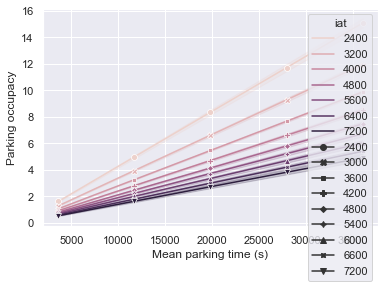

In [15]:
data = pd.DataFrame(rows)
fig = sns.lineplot(data=data, x='pt', y='num', hue='iat', style='iat', markers=True, dashes=False)
plt.xlabel("Mean parking time (s)")
plt.ylabel("Parking occupacy")
plt.grid(True, 'both')
plt.show()

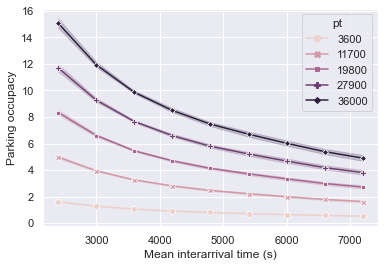

In [16]:
data = pd.DataFrame(rows)
fig2 = sns.lineplot(data=data, x='iat', y='num', hue='pt', style='pt', markers=True, dashes=False)
#fig3 = sns.lineplot(data=data, x='iat', y='deterministic', hue='pt', style='pt', markers=True, dashes=False)
plt.xlabel("Mean interarrival time (s)")
plt.ylabel("Parking occupacy")
plt.grid(True, 'both')
plt.show()

In [17]:
all_params = {}
all_runs = None
df = pd.read_csv('../results/control_tower_park3.csv')
get_all_params(df)

In [18]:
iats = range(2400, 7300, 300) # 300
pts = range(3600, 36100, 8100) # 8100
rows = []

for iat in iats:
    for pt in pts:
        runs = find_runs({'**.interarrivalTimeAvg': float(iat), '**.parkingTimeAvg': float(pt)})
        for rep, run in enumerate(runs):
            num_list = get_num_plane(run)
            num_planes = np.mean(num_list)
            perc = np.percentile(num_list, 90)
            det = math.ceil(pt/iat)
            row = {'iat': iat, 'pt': pt, 'num': num_planes, 'perc': perc, 'deterministic': det, 
                   'perc/det': perc/det}
            rows.append(row)
            print(row)

{'iat': 2400, 'pt': 3600, 'num': 1.6664077669902913, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 2400, 'pt': 3600, 'num': 1.6655182500731303, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 2400, 'pt': 3600, 'num': 1.6720582026048263, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 2400, 'pt': 3600, 'num': 1.603058402472751, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 2400, 'pt': 3600, 'num': 1.6068423275609993, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 2400, 'pt': 3600, 'num': 1.6006315926552936, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 2400, 'pt': 3600, 'num': 1.576022347094553, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 2400, 'pt': 3600, 'num': 1.611002731174405, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 2400, 'pt': 3600, 'num': 1.5840630187819407, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 2400, 'pt': 3600, 'num': 1.6198843705339743, 'perc': 3.0, 'determini

{'iat': 2400, 'pt': 27900, 'num': 11.694596176355834, 'perc': 16.0, 'deterministic': 12, 'perc/det': 1.3333333333333333}
{'iat': 2400, 'pt': 27900, 'num': 11.846368715083798, 'perc': 16.0, 'deterministic': 12, 'perc/det': 1.3333333333333333}
{'iat': 2400, 'pt': 27900, 'num': 11.98402752978606, 'perc': 16.0, 'deterministic': 12, 'perc/det': 1.3333333333333333}
{'iat': 2400, 'pt': 27900, 'num': 11.307216561960873, 'perc': 16.0, 'deterministic': 12, 'perc/det': 1.3333333333333333}
{'iat': 2400, 'pt': 27900, 'num': 11.898816106160151, 'perc': 16.0, 'deterministic': 12, 'perc/det': 1.3333333333333333}
{'iat': 2400, 'pt': 36000, 'num': 15.669533049939968, 'perc': 21.0, 'deterministic': 15, 'perc/det': 1.4}
{'iat': 2400, 'pt': 36000, 'num': 14.559143284942387, 'perc': 20.0, 'deterministic': 15, 'perc/det': 1.3333333333333333}
{'iat': 2400, 'pt': 36000, 'num': 15.317895010733103, 'perc': 20.0, 'deterministic': 15, 'perc/det': 1.3333333333333333}
{'iat': 2400, 'pt': 36000, 'num': 14.74555287678

{'iat': 2700, 'pt': 19800, 'num': 7.423522824583361, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 2700, 'pt': 19800, 'num': 7.361529586286467, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 2700, 'pt': 19800, 'num': 7.383040358153927, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 2700, 'pt': 19800, 'num': 7.511920812917229, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 2700, 'pt': 19800, 'num': 7.5992638601334255, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 2700, 'pt': 27900, 'num': 10.354841890736967, 'perc': 15.0, 'deterministic': 11, 'perc/det': 1.3636363636363635}
{'iat': 2700, 'pt': 27900, 'num': 10.700734474391764, 'perc': 15.0, 'deterministic': 11, 'perc/det': 1.3636363636363635}
{'iat': 2700, 'pt': 27900, 'num': 10.330212625679907, 'perc': 14.0, 'deterministic': 11, 'perc/det': 1.2727272727272727}
{'iat': 2700, 'pt': 27900, 'num': 10.658522933061144, 'perc': 15.0, 'deterministic': 11, 'perc/det': 1.363

{'iat': 3000, 'pt': 11700, 'num': 3.9805860805860807, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 3000, 'pt': 11700, 'num': 3.8727586664895735, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 3000, 'pt': 11700, 'num': 4.015253730351268, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 3000, 'pt': 11700, 'num': 3.9861729708169915, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 3000, 'pt': 11700, 'num': 4.057989776272986, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 3000, 'pt': 11700, 'num': 4.105853464295195, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 3000, 'pt': 19800, 'num': 6.52932561081153, 'perc': 10.0, 'deterministic': 7, 'perc/det': 1.4285714285714286}
{'iat': 3000, 'pt': 19800, 'num': 6.783639321403672, 'perc': 10.0, 'deterministic': 7, 'perc/det': 1.4285714285714286}
{'iat': 3000, 'pt': 19800, 'num': 6.633737185461324, 'perc': 10.0, 'deterministic': 7, 'perc/det': 1.4285714285714286}
{'iat': 3000, 'pt

{'iat': 3300, 'pt': 3600, 'num': 1.1671190643745182, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 3300, 'pt': 3600, 'num': 1.1484730779533887, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 3300, 'pt': 3600, 'num': 1.1684782608695652, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 3300, 'pt': 3600, 'num': 1.1645739609212382, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 3300, 'pt': 3600, 'num': 1.1687296635470128, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 3300, 'pt': 3600, 'num': 1.18844027475289, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 3300, 'pt': 3600, 'num': 1.1978849436096517, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 3300, 'pt': 11700, 'num': 3.610326123350968, 'perc': 6.0, 'deterministic': 4, 'perc/det': 1.5}
{'iat': 3300, 'pt': 11700, 'num': 3.5592685790974667, 'perc': 6.0, 'deterministic': 4, 'perc/det': 1.5}
{'iat': 3300, 'pt': 11700, 'num': 3.539048323139996, 'perc': 6.0, 'determi

{'iat': 3300, 'pt': 36000, 'num': 11.386918517030042, 'perc': 16.0, 'deterministic': 11, 'perc/det': 1.4545454545454546}
{'iat': 3300, 'pt': 36000, 'num': 10.902081029456117, 'perc': 15.0, 'deterministic': 11, 'perc/det': 1.3636363636363635}
{'iat': 3300, 'pt': 36000, 'num': 11.246410762692012, 'perc': 15.0, 'deterministic': 11, 'perc/det': 1.3636363636363635}
{'iat': 3300, 'pt': 36000, 'num': 11.474626166661091, 'perc': 16.0, 'deterministic': 11, 'perc/det': 1.4545454545454546}
{'iat': 3600, 'pt': 3600, 'num': 1.0568181818181819, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 3600, 'pt': 3600, 'num': 1.049932478055368, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 3600, 'pt': 3600, 'num': 1.0893905648916784, 'perc': 3.0, 'deterministic': 1, 'perc/det': 3.0}
{'iat': 3600, 'pt': 3600, 'num': 1.0668106357133216, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 3600, 'pt': 3600, 'num': 1.0917121855823049, 'perc': 3.0, 'deterministic': 1, 'perc/det': 3.0}
{'

{'iat': 3600, 'pt': 36000, 'num': 10.064672922432997, 'perc': 14.0, 'deterministic': 10, 'perc/det': 1.4}
{'iat': 3600, 'pt': 36000, 'num': 9.954516270739703, 'perc': 14.0, 'deterministic': 10, 'perc/det': 1.4}
{'iat': 3600, 'pt': 36000, 'num': 10.380581935744594, 'perc': 15.0, 'deterministic': 10, 'perc/det': 1.5}
{'iat': 3600, 'pt': 36000, 'num': 10.704676985195155, 'perc': 15.0, 'deterministic': 10, 'perc/det': 1.5}
{'iat': 3600, 'pt': 36000, 'num': 9.974749864791779, 'perc': 14.0, 'deterministic': 10, 'perc/det': 1.4}
{'iat': 3600, 'pt': 36000, 'num': 9.816239027683997, 'perc': 14.0, 'deterministic': 10, 'perc/det': 1.4}
{'iat': 3600, 'pt': 36000, 'num': 9.863805465367966, 'perc': 14.0, 'deterministic': 10, 'perc/det': 1.4}
{'iat': 3600, 'pt': 36000, 'num': 10.199642592217952, 'perc': 14.0, 'deterministic': 10, 'perc/det': 1.4}
{'iat': 3600, 'pt': 36000, 'num': 10.176722683404197, 'perc': 14.0, 'deterministic': 10, 'perc/det': 1.4}
{'iat': 3600, 'pt': 36000, 'num': 9.96352409232015

{'iat': 3900, 'pt': 27900, 'num': 7.455682049196991, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 3900, 'pt': 27900, 'num': 7.553696049867877, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 3900, 'pt': 27900, 'num': 6.960856871265617, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 3900, 'pt': 27900, 'num': 7.102538830166877, 'perc': 10.0, 'deterministic': 8, 'perc/det': 1.25}
{'iat': 3900, 'pt': 27900, 'num': 7.343498761830456, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 3900, 'pt': 27900, 'num': 7.102074069045114, 'perc': 10.0, 'deterministic': 8, 'perc/det': 1.25}
{'iat': 3900, 'pt': 27900, 'num': 7.42939579090292, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 3900, 'pt': 27900, 'num': 7.465927959066111, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 3900, 'pt': 27900, 'num': 7.2955501288834625, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 3900, 'pt': 27900, 'num': 7.140600047568

{'iat': 4200, 'pt': 19800, 'num': 4.615781031364118, 'perc': 7.0, 'deterministic': 5, 'perc/det': 1.4}
{'iat': 4200, 'pt': 19800, 'num': 4.660517865682858, 'perc': 7.0, 'deterministic': 5, 'perc/det': 1.4}
{'iat': 4200, 'pt': 19800, 'num': 4.822825382753094, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 4200, 'pt': 19800, 'num': 4.8777395275912605, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 4200, 'pt': 19800, 'num': 4.677405043852166, 'perc': 7.0, 'deterministic': 5, 'perc/det': 1.4}
{'iat': 4200, 'pt': 19800, 'num': 4.6742478571184645, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 4200, 'pt': 19800, 'num': 5.005173235314138, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 4200, 'pt': 19800, 'num': 4.7653315152548155, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 4200, 'pt': 19800, 'num': 4.881857259825328, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 4200, 'pt': 19800, 'num': 4.798529663190289, 'perc': 8.0, 'det

{'iat': 4500, 'pt': 3600, 'num': 0.8430733331045606, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 4500, 'pt': 3600, 'num': 0.9115343842970968, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 4500, 'pt': 11700, 'num': 2.598023403452181, 'perc': 5.0, 'deterministic': 3, 'perc/det': 1.6666666666666667}
{'iat': 4500, 'pt': 11700, 'num': 2.6977293742936403, 'perc': 5.0, 'deterministic': 3, 'perc/det': 1.6666666666666667}
{'iat': 4500, 'pt': 11700, 'num': 2.5875737210259224, 'perc': 5.0, 'deterministic': 3, 'perc/det': 1.6666666666666667}
{'iat': 4500, 'pt': 11700, 'num': 2.6590278491419177, 'perc': 5.0, 'deterministic': 3, 'perc/det': 1.6666666666666667}
{'iat': 4500, 'pt': 11700, 'num': 2.5986756330199685, 'perc': 5.0, 'deterministic': 3, 'perc/det': 1.6666666666666667}
{'iat': 4500, 'pt': 11700, 'num': 2.6945328814487692, 'perc': 5.0, 'deterministic': 3, 'perc/det': 1.6666666666666667}
{'iat': 4500, 'pt': 11700, 'num': 2.6364477970169724, 'perc': 5.0, 'deterministic

{'iat': 4500, 'pt': 36000, 'num': 8.322994944664572, 'perc': 12.0, 'deterministic': 8, 'perc/det': 1.5}
{'iat': 4500, 'pt': 36000, 'num': 8.255064614540842, 'perc': 12.0, 'deterministic': 8, 'perc/det': 1.5}
{'iat': 4500, 'pt': 36000, 'num': 7.832481739309351, 'perc': 12.0, 'deterministic': 8, 'perc/det': 1.5}
{'iat': 4500, 'pt': 36000, 'num': 8.405555175480604, 'perc': 12.0, 'deterministic': 8, 'perc/det': 1.5}
{'iat': 4500, 'pt': 36000, 'num': 7.824053069361381, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 4500, 'pt': 36000, 'num': 7.86802100133832, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 4500, 'pt': 36000, 'num': 7.991976684381965, 'perc': 11.0, 'deterministic': 8, 'perc/det': 1.375}
{'iat': 4500, 'pt': 36000, 'num': 8.572342098963855, 'perc': 12.0, 'deterministic': 8, 'perc/det': 1.5}
{'iat': 4800, 'pt': 3600, 'num': 0.7926048337120429, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 4800, 'pt': 3600, 'num': 0.7684181454118622, 'perc':

{'iat': 4800, 'pt': 27900, 'num': 5.8784108873462095, 'perc': 9.0, 'deterministic': 6, 'perc/det': 1.5}
{'iat': 4800, 'pt': 27900, 'num': 5.992751133708946, 'perc': 9.0, 'deterministic': 6, 'perc/det': 1.5}
{'iat': 4800, 'pt': 27900, 'num': 5.682560979805277, 'perc': 9.0, 'deterministic': 6, 'perc/det': 1.5}
{'iat': 4800, 'pt': 27900, 'num': 6.033348246549885, 'perc': 9.0, 'deterministic': 6, 'perc/det': 1.5}
{'iat': 4800, 'pt': 27900, 'num': 6.245449550106463, 'perc': 10.0, 'deterministic': 6, 'perc/det': 1.6666666666666667}
{'iat': 4800, 'pt': 27900, 'num': 5.875090203085804, 'perc': 9.0, 'deterministic': 6, 'perc/det': 1.5}
{'iat': 4800, 'pt': 27900, 'num': 5.614858799972382, 'perc': 9.0, 'deterministic': 6, 'perc/det': 1.5}
{'iat': 4800, 'pt': 27900, 'num': 5.7573848378434205, 'perc': 9.0, 'deterministic': 6, 'perc/det': 1.5}
{'iat': 4800, 'pt': 27900, 'num': 6.130700549450549, 'perc': 9.0, 'deterministic': 6, 'perc/det': 1.5}
{'iat': 4800, 'pt': 27900, 'num': 5.74981930820857, 'pe

{'iat': 5100, 'pt': 19800, 'num': 3.99127435764787, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 5100, 'pt': 19800, 'num': 4.05335128975448, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 5100, 'pt': 19800, 'num': 3.9659988275457776, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 5100, 'pt': 19800, 'num': 3.7240543161978663, 'perc': 6.0, 'deterministic': 4, 'perc/det': 1.5}
{'iat': 5100, 'pt': 19800, 'num': 3.823653387693052, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 5100, 'pt': 19800, 'num': 3.826699834162521, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 5100, 'pt': 19800, 'num': 3.9748342999171498, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 5100, 'pt': 19800, 'num': 4.0118924508790075, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 5100, 'pt': 19800, 'num': 4.170382110739758, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 5100, 'pt': 19800, 'num': 3.9719713162793906, 'perc': 7

{'iat': 5400, 'pt': 11700, 'num': 2.1717066749800824, 'perc': 4.0, 'deterministic': 3, 'perc/det': 1.3333333333333333}
{'iat': 5400, 'pt': 11700, 'num': 2.1977473574770405, 'perc': 4.0, 'deterministic': 3, 'perc/det': 1.3333333333333333}
{'iat': 5400, 'pt': 11700, 'num': 2.3452566096423015, 'perc': 4.0, 'deterministic': 3, 'perc/det': 1.3333333333333333}
{'iat': 5400, 'pt': 11700, 'num': 2.067577407163413, 'perc': 4.0, 'deterministic': 3, 'perc/det': 1.3333333333333333}
{'iat': 5400, 'pt': 11700, 'num': 2.238327791632031, 'perc': 4.0, 'deterministic': 3, 'perc/det': 1.3333333333333333}
{'iat': 5400, 'pt': 11700, 'num': 2.1588775333448815, 'perc': 4.0, 'deterministic': 3, 'perc/det': 1.3333333333333333}
{'iat': 5400, 'pt': 11700, 'num': 2.260444044819477, 'perc': 4.0, 'deterministic': 3, 'perc/det': 1.3333333333333333}
{'iat': 5400, 'pt': 11700, 'num': 2.320889842236369, 'perc': 4.0, 'deterministic': 3, 'perc/det': 1.3333333333333333}
{'iat': 5400, 'pt': 11700, 'num': 2.2396957123098202

{'iat': 5700, 'pt': 3600, 'num': 0.6669329350883896, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 5700, 'pt': 3600, 'num': 0.6323422013562858, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 5700, 'pt': 3600, 'num': 0.6777140871981935, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 5700, 'pt': 3600, 'num': 0.6946805926645616, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 5700, 'pt': 3600, 'num': 0.6968550402665926, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 5700, 'pt': 3600, 'num': 0.6573861661452902, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 5700, 'pt': 3600, 'num': 0.6864521503696761, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 5700, 'pt': 3600, 'num': 0.6948645735544661, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 5700, 'pt': 3600, 'num': 0.7162968099861303, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 5700, 'pt': 3600, 'num': 0.6963815333425759, 'perc': 2.0, 'determ

{'iat': 5700, 'pt': 27900, 'num': 4.848804891606448, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 5700, 'pt': 27900, 'num': 5.270395785679629, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 5700, 'pt': 27900, 'num': 5.13948728622472, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 5700, 'pt': 36000, 'num': 6.516800888642044, 'perc': 10.0, 'deterministic': 7, 'perc/det': 1.4285714285714286}
{'iat': 5700, 'pt': 36000, 'num': 5.920605112154408, 'perc': 9.0, 'deterministic': 7, 'perc/det': 1.2857142857142858}
{'iat': 5700, 'pt': 36000, 'num': 6.174765380604796, 'perc': 10.0, 'deterministic': 7, 'perc/det': 1.4285714285714286}
{'iat': 5700, 'pt': 36000, 'num': 6.5208651046721195, 'perc': 10.0, 'deterministic': 7, 'perc/det': 1.4285714285714286}
{'iat': 5700, 'pt': 36000, 'num': 6.397236974556562, 'perc': 10.0, 'deterministic': 7, 'perc/det': 1.4285714285714286}
{'iat': 5700, 'pt': 36000, 'num': 6.694452149791956, 'perc': 10.0, 'deterministic': 7, 'perc/det'

{'iat': 6000, 'pt': 27900, 'num': 4.568538699905992, 'perc': 7.0, 'deterministic': 5, 'perc/det': 1.4}
{'iat': 6000, 'pt': 27900, 'num': 4.883335072524262, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 6000, 'pt': 27900, 'num': 4.747381971262568, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 6000, 'pt': 27900, 'num': 4.464861851503432, 'perc': 7.0, 'deterministic': 5, 'perc/det': 1.4}
{'iat': 6000, 'pt': 27900, 'num': 4.809976992261033, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 6000, 'pt': 27900, 'num': 4.7428869202709745, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 6000, 'pt': 27900, 'num': 4.460047330688383, 'perc': 7.0, 'deterministic': 5, 'perc/det': 1.4}
{'iat': 6000, 'pt': 27900, 'num': 4.750930920480251, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 6000, 'pt': 27900, 'num': 4.72729168839295, 'perc': 8.0, 'deterministic': 5, 'perc/det': 1.6}
{'iat': 6000, 'pt': 27900, 'num': 4.68673860076575, 'perc': 7.0, 'determi

{'iat': 6300, 'pt': 19800, 'num': 2.9185969325367713, 'perc': 5.0, 'deterministic': 4, 'perc/det': 1.25}
{'iat': 6300, 'pt': 19800, 'num': 3.2809415867480385, 'perc': 6.0, 'deterministic': 4, 'perc/det': 1.5}
{'iat': 6300, 'pt': 19800, 'num': 3.042043510144219, 'perc': 5.0, 'deterministic': 4, 'perc/det': 1.25}
{'iat': 6300, 'pt': 19800, 'num': 3.183749651130338, 'perc': 5.0, 'deterministic': 4, 'perc/det': 1.25}
{'iat': 6300, 'pt': 19800, 'num': 3.384031212986832, 'perc': 6.0, 'deterministic': 4, 'perc/det': 1.5}
{'iat': 6300, 'pt': 19800, 'num': 3.198683110367893, 'perc': 6.0, 'deterministic': 4, 'perc/det': 1.5}
{'iat': 6300, 'pt': 19800, 'num': 3.136331914299672, 'perc': 5.0, 'deterministic': 4, 'perc/det': 1.25}
{'iat': 6300, 'pt': 19800, 'num': 3.2306861720654823, 'perc': 6.0, 'deterministic': 4, 'perc/det': 1.5}
{'iat': 6300, 'pt': 19800, 'num': 3.242638068955881, 'perc': 6.0, 'deterministic': 4, 'perc/det': 1.5}
{'iat': 6300, 'pt': 19800, 'num': 3.186119434185771, 'perc': 6.0, 

{'iat': 6600, 'pt': 11700, 'num': 1.9109519650655022, 'perc': 4.0, 'deterministic': 2, 'perc/det': 2.0}
{'iat': 6600, 'pt': 11700, 'num': 1.6937673178773105, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 6600, 'pt': 11700, 'num': 1.781524362517052, 'perc': 4.0, 'deterministic': 2, 'perc/det': 2.0}
{'iat': 6600, 'pt': 11700, 'num': 1.786061305092447, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 6600, 'pt': 11700, 'num': 1.9152471376710416, 'perc': 4.0, 'deterministic': 2, 'perc/det': 2.0}
{'iat': 6600, 'pt': 11700, 'num': 1.916527021365731, 'perc': 4.0, 'deterministic': 2, 'perc/det': 2.0}
{'iat': 6600, 'pt': 11700, 'num': 1.756353707204369, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 6600, 'pt': 11700, 'num': 1.66189392613338, 'perc': 3.0, 'deterministic': 2, 'perc/det': 1.5}
{'iat': 6600, 'pt': 11700, 'num': 1.833787656391976, 'perc': 4.0, 'deterministic': 2, 'perc/det': 2.0}
{'iat': 6600, 'pt': 11700, 'num': 1.7311286089238844, 'perc': 4.0, 'det

{'iat': 6900, 'pt': 3600, 'num': 0.5567541063986271, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 6900, 'pt': 3600, 'num': 0.5899167308096005, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 6900, 'pt': 3600, 'num': 0.5631496062992126, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 6900, 'pt': 3600, 'num': 0.5703568674191966, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 6900, 'pt': 3600, 'num': 0.5681253716724385, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 6900, 'pt': 3600, 'num': 0.5922971980270753, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 6900, 'pt': 3600, 'num': 0.5559910414333706, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 6900, 'pt': 3600, 'num': 0.5331318951584569, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 6900, 'pt': 3600, 'num': 0.5529617946021731, 'perc': 2.0, 'deterministic': 1, 'perc/det': 2.0}
{'iat': 6900, 'pt': 3600, 'num': 0.555419409046352, 'perc': 2.0, 'determi

{'iat': 6900, 'pt': 36000, 'num': 5.161829652996845, 'perc': 8.0, 'deterministic': 6, 'perc/det': 1.3333333333333333}
{'iat': 6900, 'pt': 36000, 'num': 5.175360593754376, 'perc': 8.0, 'deterministic': 6, 'perc/det': 1.3333333333333333}
{'iat': 6900, 'pt': 36000, 'num': 5.5140298089706805, 'perc': 9.0, 'deterministic': 6, 'perc/det': 1.5}
{'iat': 6900, 'pt': 36000, 'num': 5.531535313254277, 'perc': 9.0, 'deterministic': 6, 'perc/det': 1.5}
{'iat': 6900, 'pt': 36000, 'num': 5.125801366263794, 'perc': 8.0, 'deterministic': 6, 'perc/det': 1.3333333333333333}
{'iat': 6900, 'pt': 36000, 'num': 5.438164893617022, 'perc': 8.0, 'deterministic': 6, 'perc/det': 1.3333333333333333}
{'iat': 6900, 'pt': 36000, 'num': 5.038283388307952, 'perc': 8.0, 'deterministic': 6, 'perc/det': 1.3333333333333333}
{'iat': 6900, 'pt': 36000, 'num': 4.864904655075715, 'perc': 7.0, 'deterministic': 6, 'perc/det': 1.1666666666666667}
{'iat': 6900, 'pt': 36000, 'num': 5.299950994119294, 'perc': 8.0, 'deterministic': 6,

{'iat': 7200, 'pt': 27900, 'num': 3.9446722029503487, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 7200, 'pt': 27900, 'num': 3.8814552343530733, 'perc': 6.0, 'deterministic': 4, 'perc/det': 1.5}
{'iat': 7200, 'pt': 27900, 'num': 4.016145449440174, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 7200, 'pt': 27900, 'num': 3.550482540796631, 'perc': 6.0, 'deterministic': 4, 'perc/det': 1.5}
{'iat': 7200, 'pt': 27900, 'num': 4.144900606528065, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 7200, 'pt': 27900, 'num': 3.8825326590813316, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 7200, 'pt': 27900, 'num': 3.8251603631392617, 'perc': 7.0, 'deterministic': 4, 'perc/det': 1.75}
{'iat': 7200, 'pt': 27900, 'num': 3.701168438093897, 'perc': 6.0, 'deterministic': 4, 'perc/det': 1.5}
{'iat': 7200, 'pt': 27900, 'num': 3.756421052631579, 'perc': 6.0, 'deterministic': 4, 'perc/det': 1.5}
{'iat': 7200, 'pt': 27900, 'num': 4.158468222268937, 'perc': 7.0

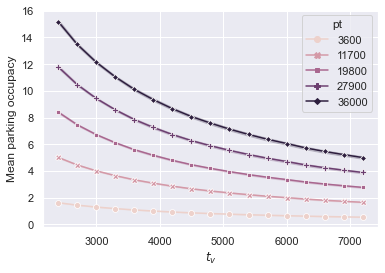

In [19]:
data = pd.DataFrame(rows)
fig2 = sns.lineplot(data=data, x='iat', y='num', hue='pt', style='pt', markers=True, dashes=False)
#fig3 = sns.lineplot(data=data, x='iat', y='deterministic', hue='pt', style='pt', markers=True, dashes=False)
plt.xlabel("$t_v$")
plt.ylabel("Mean parking occupacy")
plt.grid(True, 'both')
plt.show()

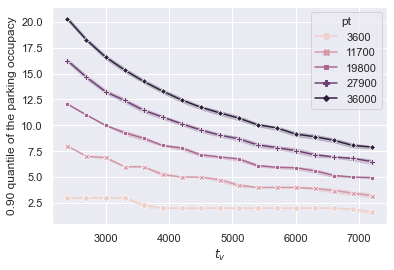

In [20]:
data = pd.DataFrame(rows)
fig2 = sns.lineplot(data=data, x='iat', y='perc', hue='pt', style='pt', markers=True, dashes=False)
#fig3 = sns.lineplot(data=data, x='iat', y='deterministic', hue='pt', style='pt', markers=True, dashes=False)
plt.xlabel("$t_v$")
plt.ylabel("0.90 quantile of the parking occupacy")
plt.grid(True, 'both')
plt.show()

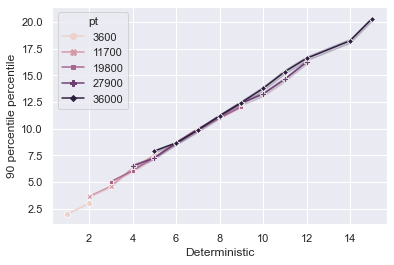

In [21]:
data = pd.DataFrame(rows)
fig2 = sns.lineplot(data=data, x='deterministic', y='perc', hue='pt', style='pt', markers=True, dashes=False)
plt.xlabel("Deterministic")
plt.ylabel("90 percentile percentile")
plt.grid(True, 'both')
plt.show()

In [22]:
data = pd.DataFrame(rows)
righe_da_fittare = []
for i in range(int(len(data)/20)):
    num_mean = np.mean(data['num'][20*i:20*i+20])
    det_mean = np.mean(data['deterministic'][20*i:20*i+20])
    perc_mean = np.mean(data['perc'][20*i:20*i+20])
    riga = {'iat': data['iat'][i*20], 'pt': data['pt'][i*20], 'num': num_mean, 
            'deterministic': data['deterministic'][i*20], 'perc': data['perc'][i*20]}
    righe_da_fittare.append(riga)
data_da_fittare = pd.DataFrame(righe_da_fittare)
data_da_fittare

,iat,pt,num,deterministic,perc
0,2400,3600,1.619550,2,3.0
1,2400,11700,5.009844,5,8.0
2,2400,19800,8.401488,9,12.0
3,2400,27900,11.790158,12,16.0
4,2400,36000,15.181219,15,21.0
...,...,...,...,...,...
80,7200,3600,0.536061,1,1.0
81,7200,11700,1.651705,2,4.0
82,7200,19800,2.767128,3,5.0
83,7200,27900,3.883398,4,7.0


[1.29851883 0.77097012]
[0.01903166 0.11383489]
[ 1  2  3  4  5  6  7  8  9 10 11 12 14 15]


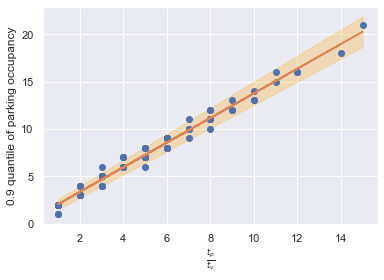

In [23]:
def fittami(x, a, b):
    return a*x+b

pars, cov = sp.optimize.curve_fit(f=fittami, xdata=data_da_fittare['deterministic'], 
                                  ydata=data_da_fittare['perc'], p0=[1, -0.01])
print(pars)

sigma_ab = np.sqrt(np.diagonal(cov))
print(sigma_ab)

y = (pars[0]) * data_da_fittare['deterministic'] + (pars[1])
x = np.sort(np.unique(data_da_fittare['deterministic']))
y_lower = (pars[0] - 4 * sigma_ab[0]) * x + pars[1] - 4 * sigma_ab[1] 
y_upper = (pars[0] + 4 * sigma_ab[0]) * x + pars[1] + 4 * sigma_ab[1] 
plt.plot(data_da_fittare['deterministic'], data_da_fittare['perc'], "o")
plt.plot(data_da_fittare['deterministic'], y)
# plotting the confidence intervals
plt.fill_between(x, y_lower, y_upper, color = 'orange', alpha = 0.25)
plt.xlabel(r'$\frac{t_p}{t_v}$')
plt.ylabel("0.9 quantile of parking occupancy")

print(x)
    

[1.15384615 0.69230769]
     iat    pt       num  deterministic  perc
0   2400  3600  1.619550              2   3.0
5   2700  3600  1.438492              2   3.0
10  3000  3600  1.296112              2   3.0
15  3300  3600  1.179236              2   3.0
20  3600  3600  1.079561              1   2.0
25  3900  3600  0.998280              1   2.0
30  4200  3600  0.925976              1   2.0
35  4500  3600  0.862824              1   2.0
40  4800  3600  0.809685              1   2.0
45  5100  3600  0.762656              1   2.0
50  5400  3600  0.720270              1   2.0
55  5700  3600  0.680900              1   2.0
60  6000  3600  0.648539              1   2.0
65  6300  3600  0.614375              1   2.0
70  6600  3600  0.585312              1   2.0
75  6900  3600  0.560329              1   1.0
80  7200  3600  0.536061              1   1.0
[1.33208955 0.84701493]
     iat     pt       num  deterministic  perc
1   2400  11700  5.009844              5   8.0
6   2700  11700  4.446063     

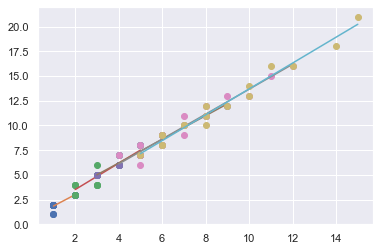

In [24]:
def fittami(x, a, b):
    return a*x+b

grouped = data_da_fittare.groupby('pt')
for i in range(3600, 36100, 8100):
    datapt = grouped.get_group(i)
    pars, cov = sp.optimize.curve_fit(f=fittami, xdata=datapt['deterministic'], ydata=datapt['perc'], p0=[1, -0.01])
    print(pars)
    print(datapt)
    y = (pars[0]) * datapt['deterministic'] + (pars[1])
    plt.plot(datapt['deterministic'], datapt['perc'], "o")
    plt.plot(datapt['deterministic'], y)
    

In [25]:
def fittami(x, a, b):
    return a*x**b

for i in range(3600, 36100, 8100):
    datapt = grouped.get_group(i)
    pars, cov = sp.optimize.curve_fit(f=fittami, xdata=datapt['iat'], ydata=datapt['num'], p0=[1, -0.01])
    print(pars)

[ 3.96742138e+03 -1.00254163e+00]
[ 1.25663831e+04 -1.00557933e+00]
[ 2.11744009e+04 -1.00621013e+00]
[ 2.97623111e+04 -1.00640428e+00]
[ 3.84017688e+04 -1.00666538e+00]


[ 3.84017688e+04 -1.00666538e+00]


Text(0.5, 0, '$t_v$')

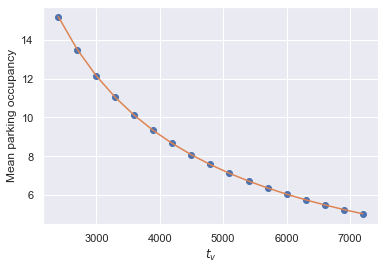

In [26]:
def fittami(x, a, b):
    return a*x**b

datapt = grouped.get_group(36000)
pars, cov = sp.optimize.curve_fit(f=fittami, xdata=datapt['iat'], ydata=datapt['num'], p0=[1, -0.1])
print(pars)

y = (pars[0]) * datapt['iat'] ** (pars[1])
plt.plot(datapt['iat'], datapt['num'], "o")
plt.plot(datapt['iat'], y)
plt.ylabel("Mean parking occupancy")
plt.xlabel("$t_v$")

In [27]:
chi = np.sum((datapt['num']-y)**2/y)
chi

0.0008885236081390642

In [28]:
prova = find_runs({'**.interarrivalTimeAvg': 2400, '**.parkingTimeAvg': 36000})
for rep, run in enumerate(prova):
    num_list = get_num_plane(run)
    num_planes = np.mean(num_list)
np.set_printoptions(threshold=np.inf)
print(num_list)

[13. 13. 12. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 10. 10. 11. 10. 10.
 10. 10. 10. 10. 10. 10. 11. 11. 11. 11. 12. 12. 12. 12. 12. 13. 13. 13.
 13. 13. 13. 12. 13. 13. 14. 14. 14. 14. 14. 14. 14. 14. 15. 15. 15. 14.
 14. 14. 14. 14. 14. 14. 14. 14. 15. 16. 16. 16. 17. 18. 18. 18. 18. 18.
 17. 17. 17. 17. 17. 17. 16. 17. 17. 18. 18. 18. 18. 18. 17. 17. 17. 17.
 17. 17. 16. 16. 16. 16. 16. 15. 15. 15. 14. 14. 13. 13. 13. 13. 12. 13.
 13. 13. 12. 12. 13. 13. 13. 13. 13. 13. 13. 14. 14. 14. 13. 14. 14. 14.
 14. 14. 14. 14. 14. 14. 14. 14. 14. 14. 14. 14. 15. 15. 15. 15. 15. 15.
 15. 14. 14. 14. 14. 13. 13. 13. 14. 13. 13. 13. 13. 12. 12. 12. 12. 12.
 12. 12. 12. 12. 12. 11. 10. 10. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 10. 10.  9.  9.  9.  9.  9. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 11. 11. 11. 10. 10.
 10. 10. 11. 11. 11. 11. 11. 11. 11. 12. 13. 13. 13. 13. 13. 13. 14. 14.
 13. 13. 13. 13. 14. 14. 14. 14. 14. 14. 15. 15. 15